In [2]:
#import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

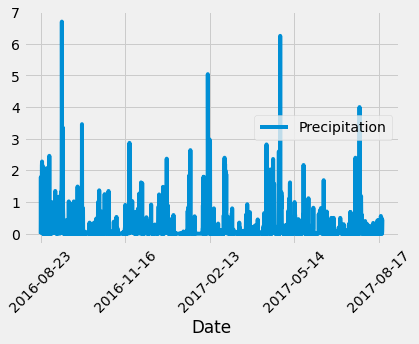

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores
prcp = session.query(measurement.date, measurement.prcp).\
                    filter(measurement.date >= '2016-08-23').\
                    filter(measurement.date <='2017-08-23').all()
prcp
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp, columns=['Date', 'Precipitation']).set_index('Date')
prcp_df


# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by='Date').dropna()
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(rot=45)
plt.savefig("prcp_analysis.png")
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# Design a query to show how many stations are available in this dataset - 
stations = session.query(station.id).count()
stations

9

In [14]:
# Most active stations
# Create query to show most active stations in order
active_stations = session.query(measurement.station, func.count(measurement.station)).\
                group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active = session.query(func.min(measurement.tobs), 
              func.max(measurement.tobs), 
              func.avg(measurement.tobs).filter(measurement.station == 'USC00519281'))
most_active.all()

[(53.0, 87.0, 71.66378066378067)]

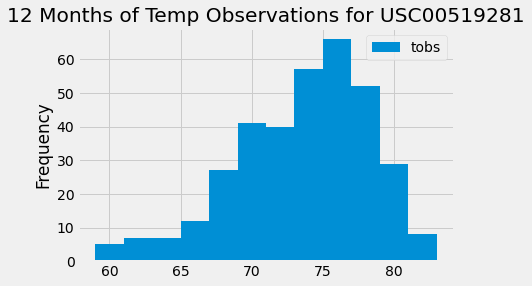

In [16]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
USC00519281 = session.query(measurement.date, measurement.tobs).\
            filter(measurement.station == 'USC00519281').\
            filter(measurement.date > '2016-08-23').all()
USC00519281
#Create dataframe using data from query
USC00519281_df = pd.DataFrame(USC00519281)
USC00519281_df.plot(kind='hist', bins=12)
plt.title('12 Months of Temp Observations for USC00519281')
plt.savefig("tempobservations.png")
